<a href="https://colab.research.google.com/github/dontneed20/MLtp/blob/main/MLtp_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

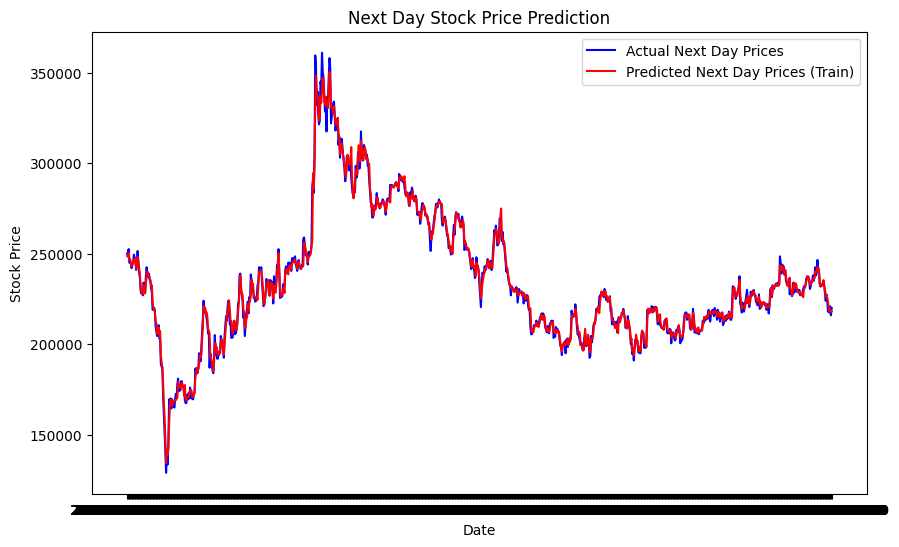

Mean Squared Error (Train): 10664244.317747077
Mean Absolute Error Percentage for Next Day Close (Train): 0.93%
Mean Squared Error (Test): 30285930.8994709
Mean Absolute Error Percentage for Next Day Close (Test): 1.75


In [29]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = "/content/01.csv"  # 실제 파일 경로로 바꿔주세요
data = pd.read_csv(file_path)

# 다음날 종가를 예측하기 위해 현재 종가를 하나씩 밀어서 '다음날 종가' 열 추가
data['다음날 종가'] = data['Close'].shift(-1)

# NaN 값이 있는 행 제거
data = data.dropna()

# 특성과 타겟 설정
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]  # 시가, 고가, 저가, 거래량을 특성으로 사용
target = data['다음날 종가']  # 종가를 예측 대상으로 사용

# 특성 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 전체 데이터에 대한 예측 결과 출력
predictions_train = model.predict(features_scaled)

# 예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['다음날 종가'], label='Actual Next Day Prices', color='blue')
plt.plot(data['Date'], predictions_train, label='Predicted Next Day Prices (Train)', color='red')
plt.title("Next Day Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 성능 평가 (훈련 데이터)
mse_train = mean_squared_error(target, predictions_train)
print(f"Mean Squared Error (Train): {mse_train}")

mae_train = mean_absolute_error(target, predictions_train)
mae_percentage_train = (mae_train / average_next_day_close) * 100
print(f"Mean Absolute Error Percentage for Next Day Close (Train): {mae_percentage_train:.2f}%")

# 성능 평가 (테스트 데이터)
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Mean Squared Error (Test): {mse_test}")

mae_test = mean_absolute_error(y_test, predictions_test)
mae_percentage_test = (mae_test / average_next_day_close) * 100
print(f"Mean Absolute Error Percentage for Next Day Close (Test): {mae_percentage_test:.2f}")



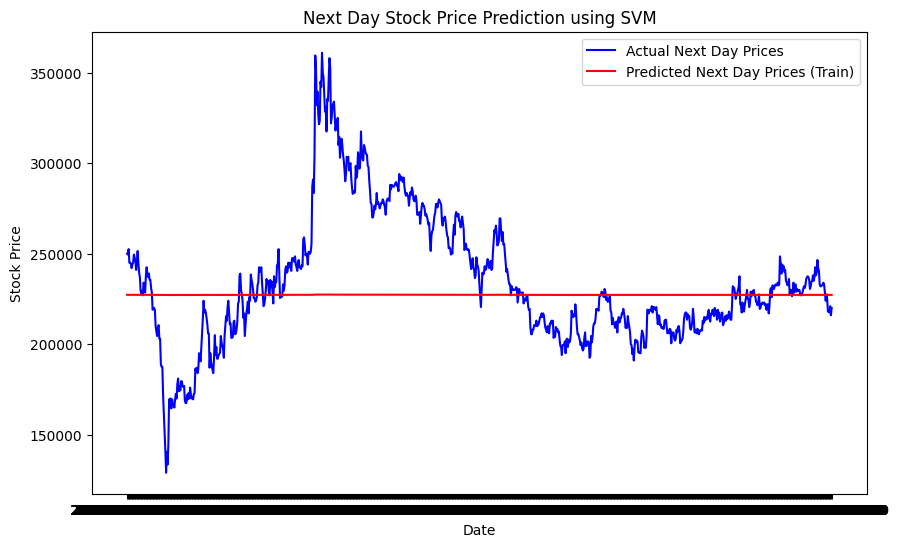

Mean Squared Error (Train): 1354418259.74279
Mean Absolute Error Percentage for Next Day Close (Train): 11.93%
Mean Squared Error (Test): 1471224774.8999631
Mean Absolute Error Percentage for Next Day Close (Test): 12.37


In [30]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = "/content/01.csv"  # 실제 파일 경로로 바꿔주세요
data = pd.read_csv(file_path)

# 다음날 종가를 예측하기 위해 현재 종가를 하나씩 밀어서 '다음날 종가' 열 추가
data['다음날 종가'] = data['Close'].shift(-1)

# NaN 값이 있는 행 제거
data = data.dropna()

# 특성과 타겟 설정
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]  # 시가, 고가, 저가, 거래량을 특성으로 사용
target = data['다음날 종가']  # 종가를 예측 대상으로 사용

# 특성 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# SVM 모델 생성 및 훈련
model = SVR(kernel='linear')  # 선형 커널을 사용하는 SVM 모델
model.fit(X_train, y_train)

# 전체 데이터에 대한 예측 결과 출력
predictions_train = model.predict(features_scaled)

# 예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['다음날 종가'], label='Actual Next Day Prices', color='blue')
plt.plot(data['Date'], predictions_train, label='Predicted Next Day Prices (Train)', color='red')
plt.title("Next Day Stock Price Prediction using SVM")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 성능 평가 (훈련 데이터)
mse_train = mean_squared_error(target, predictions_train)
print(f"Mean Squared Error (Train): {mse_train}")

mae_train = mean_absolute_error(target, predictions_train)
mae_percentage_train = (mae_train / average_next_day_close) * 100
print(f"Mean Absolute Error Percentage for Next Day Close (Train): {mae_percentage_train:.2f}%")

# 성능 평가 (테스트 데이터)
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Mean Squared Error (Test): {mse_test}")

mae_test = mean_absolute_error(y_test, predictions_test)
mae_percentage_test = (mae_test / average_next_day_close) * 100
print(f"Mean Absolute Error Percentage for Next Day Close (Test): {mae_percentage_test:.2f}%")
